<>:69: SyntaxWarning: invalid escape sequence '\m'
<>:69: SyntaxWarning: invalid escape sequence '\ '
<>:69: SyntaxWarning: invalid escape sequence '\m'
<>:69: SyntaxWarning: invalid escape sequence '\ '
/var/folders/x7/wx6vsrv14yb8t8zyw52zj5r80000gn/T/ipykernel_61759/1086612288.py:69: SyntaxWarning: invalid escape sequence '\m'
  ax.set_title(f'VIX Positively Skewed Distribution: $\mu={round(mu, 2)},\ \sigma={round(sigma, 2)}$')
/var/folders/x7/wx6vsrv14yb8t8zyw52zj5r80000gn/T/ipykernel_61759/1086612288.py:69: SyntaxWarning: invalid escape sequence '\ '
  ax.set_title(f'VIX Positively Skewed Distribution: $\mu={round(mu, 2)},\ \sigma={round(sigma, 2)}$')
/var/folders/x7/wx6vsrv14yb8t8zyw52zj5r80000gn/T/ipykernel_61759/1086612288.py:57: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_reading = vixD

data up to date
            CLOSE
DATE             
2024-06-05  12.63
2024-06-06  12.58
2024-06-07  12.22
2024-06-10  12.74
2024-06-11  12.85


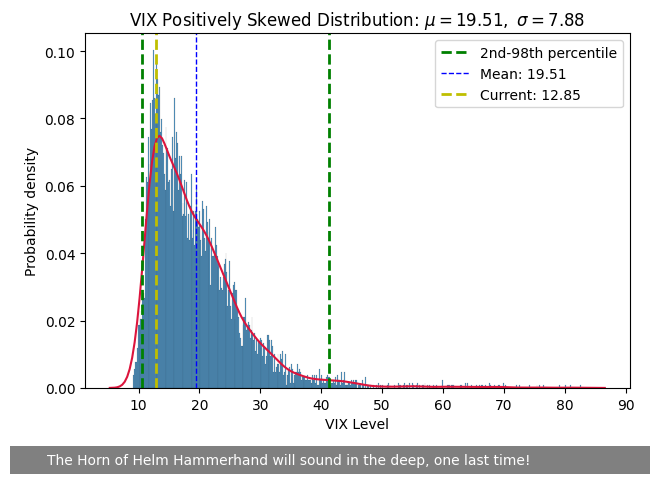

In [5]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, matplotlib.dates as mpl_dates
import sys, os, math, dateutil.parser, datetime, sys, pandas_market_calendars as mcal

from statsmodels.stats.weightstats import DescrStatsW
from datetime import date

from scipy import stats
import yfinance as yf
import seaborn as sns

yf.pdr_override()
import pandas_datareader.data as pdr

def constructDF():
    vixDf = pd.read_csv('VIX.csv')
    vixDf.index = pd.to_datetime(vixDf['DATE'], format='mixed')
    vixDf.drop(columns=['DATE','OPEN','HIGH','LOW'], inplace=True)
    return vixDf

def update_data():
    nyse = mcal.get_calendar('NYSE')
    today = date.today()
    vixDf = constructDF()
    last_saved_date = vixDf.index[-1]
    last_date_forward = (last_saved_date + datetime.timedelta(days=1)).strftime("%Y-%m-%d")
    last_traded =  pd.to_datetime(today) - pd.tseries.offsets.CustomBusinessDay(1, holidays = nyse.holidays().holidays)
    
    if last_saved_date != last_traded:
        with open('VIX.csv', 'a+') as file:
            file.write('\n')
        print(last_saved_date, last_traded)
        vix_import_df = pdr.get_data_yahoo('^VIX', last_date_forward)
        vix_import_df = vix_import_df.reindex(columns=['Open', 'High', 'Low', 'Close'])
        vix_import_df = vix_import_df.round(2)
        vix_import_df.to_csv('VIX.csv', mode='a', header=False, encoding=None)
    else:
        print('data up to date')
    return vixDf

# ----------------------------------------------------------------------------------------------------------------

if __name__ == "__main__":
    
    def signaturebar(fig,text,fontsize=10,pad=5,xpos=20,ypos=7.5,
                 rect_kw = {"facecolor":"grey", "edgecolor":None},
                 text_kw = {"color":"w"}):
        w,h = fig.get_size_inches()
        height = ((fontsize+2*pad)/72.)/h
        rect = plt.Rectangle((0,0),1,height, transform=fig.transFigure, clip_on=False,**rect_kw)
        fig.axes[0].add_patch(rect)
        fig.text(xpos/72./h, ypos/72./h, text,fontsize=fontsize,**text_kw)
        fig.subplots_adjust(bottom=fig.subplotpars.bottom+height)
    
    def plot_price_paths_whs(vixDf):
        
        mu = np.average(vixDf['CLOSE'])  # mean of distribution
        last_reading = vixDf['CLOSE'][-1]
#         sigma = np.std(vixDf['CLOSE'])  # standard deviation of distribution
        num_bins = 500
        
        _, sigma = stats.norm.fit(vixDf['CLOSE'])
        fig, ax = plt.subplots()
        
        sns.histplot(vixDf['CLOSE'], bins = 500,line_kws={'ls': ':', 'lw':2},stat='density')
        sns.kdeplot(vixDf['CLOSE'], color='crimson')

        ax.set_xlabel('VIX Level')
        ax.set_ylabel('Probability density')
        ax.set_title(f'VIX Positively Skewed Distribution: $\mu={round(mu, 2)},\ \sigma={round(sigma, 2)}$')
        
        fig.tight_layout() # Tweak spacing to prevent clipping of ylabel
        #1 std percentiles: 16 -> 84 
        #2 std percentiles: 2 --> 98
        ax.axvline(np.percentile(vixDf,2), color='g', linestyle='dashed', linewidth=2, label = '2nd-98th percentile')
        ax.axvline(np.percentile(vixDf,98), color='g', linestyle='dashed', linewidth=2)
        ax.axvline(mu, color='b', linestyle='dashed', linewidth=1, label = f'Mean: {round(mu, 2)}')
        ax.axvline(last_reading, color='y', linestyle='dashed', linewidth=2, label = f'Current: {last_reading}')
        plt.legend(loc ="upper right")
        signaturebar(fig,"The Horn of Helm Hammerhand will sound in the deep, one last time!")

        plt.show()
        #legend
        
#         plt.show()
    # ------------ method for plotting historical + price paths ------------
    
    vixDf = update_data()
    print(vixDf.tail(5))
    plot_price_paths_whs(vixDf)

Data is up to date.
            CLOSE
DATE             
2024-06-05  12.63
2024-06-06  12.58
2024-06-07  12.22
2024-06-10  12.74
2024-06-11  12.85


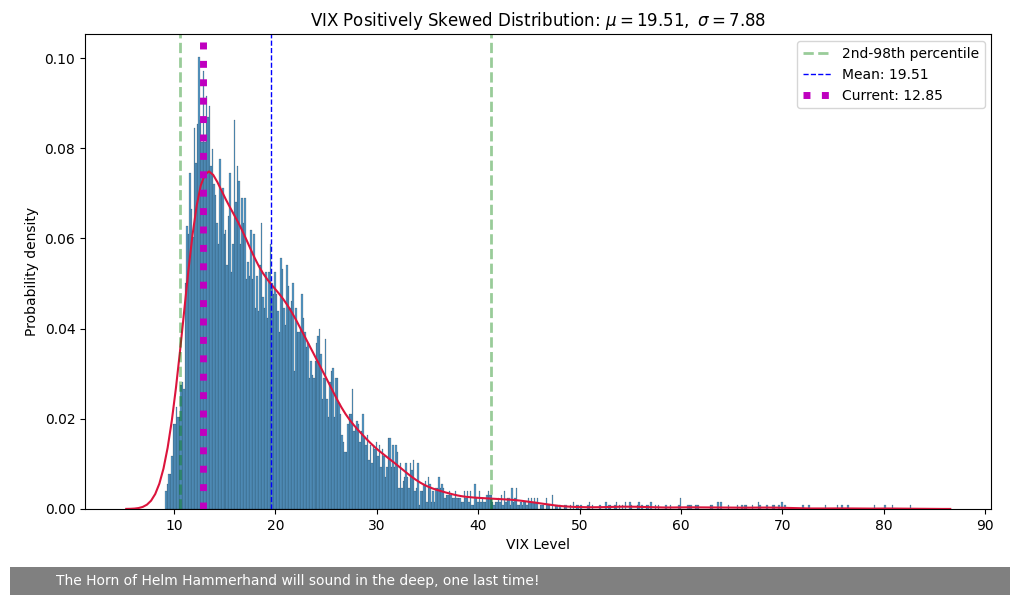

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
import datetime
import pandas_market_calendars as mcal
from scipy import stats
import yfinance as yf
import seaborn as sns

yf.pdr_override()
import pandas_datareader.data as pdr

def fetch_vix_data():
    """
    Fetch VIX data from Yahoo Finance and save to CSV.
    """
    nyse = mcal.get_calendar('NYSE')
    today = datetime.date.today()
    vixDf = read_vix_data()
    last_saved_date = vixDf.index[-1]
    last_date_forward = (last_saved_date + datetime.timedelta(days=1)).strftime("%Y-%m-%d")
    last_traded =  pd.to_datetime(today) - pd.tseries.offsets.CustomBusinessDay(1, holidays = nyse.holidays().holidays)
    
    if last_saved_date != last_traded:
        with open('VIX.csv', 'a+') as file:
            file.write('\n')
        print(last_saved_date, last_traded)
        vix_import_df = pdr.get_data_yahoo('^VIX', last_date_forward)
        vix_import_df = vix_import_df.reindex(columns=['Open', 'High', 'Low', 'Close'])
        vix_import_df = vix_import_df.round(2)
        vix_import_df.to_csv('VIX.csv', mode='a', header=False, encoding=None)
    else:
        print('Data is up to date.')
    return vixDf

def read_vix_data():
    """
    Read VIX data from CSV file.
    """
    vixDf = pd.read_csv('VIX.csv')
    vixDf.index = pd.to_datetime(vixDf['DATE'], format='mixed')
    vixDf.drop(columns=['DATE','OPEN','HIGH','LOW'], inplace=True)
    return vixDf

def add_signature_bar(fig, text, fontsize=10, pad=5, xpos=20, ypos=7.5,
                      rect_kw={"facecolor": "grey", "edgecolor": None},
                      text_kw={"color": "w"}):
    """
    Add signature bar to the plot.
    """
    w, h = fig.get_size_inches()
    height = ((fontsize + 2 * pad) / 72.) / h
    rect = plt.Rectangle((0, 0), 1, height, transform=fig.transFigure, clip_on=False, **rect_kw)
    fig.axes[0].add_patch(rect)
    fig.text(xpos / 72. / h, ypos / 72. / h, text, fontsize=fontsize, **text_kw)
    fig.subplots_adjust(bottom=fig.subplotpars.bottom + height)

def plot_vix_distribution(vixDf):
    """
    Plot VIX distribution and statistics.
    """
    mu = np.average(vixDf['CLOSE'])  # mean of distribution
    num_bins = 500
    
    _, sigma = stats.norm.fit(vixDf['CLOSE'])
    fig, ax = plt.subplots(figsize=(10, 6))  # Adjusting the figure size
    
    sns.histplot(vixDf['CLOSE'], bins=500, line_kws={'ls': ':', 'lw':2}, stat='density')
    sns.kdeplot(vixDf['CLOSE'], color='crimson')

    ax.set_xlabel('VIX Level')
    ax.set_ylabel('Probability density')
    ax.set_title(r'VIX Positively Skewed Distribution: $\mu={:.2f},\ \sigma={:.2f}$'.format(mu, sigma))
    
    fig.tight_layout() # Tweak spacing to prevent clipping of ylabel
    #1 std percentiles: 16 -> 84 
    #2 std percentiles: 2 --> 98
    ax.axvline(np.percentile(vixDf['CLOSE'], 2), color='g', alpha=0.4, linestyle='dashed', linewidth=2, label='2nd-98th percentile')
    ax.axvline(np.percentile(vixDf['CLOSE'], 98), color='g', alpha=0.4, linestyle='dashed', linewidth=2)
    ax.axvline(mu, color='b', linestyle='dashed', linewidth=1, label=f'Mean: {round(mu, 2)}')
    ax.axvline(vixDf['CLOSE'].iloc[-1], color='m', linestyle=':', linewidth=5, label=f'Current: {vixDf["CLOSE"].iloc[-1]}')
    # ax.axvspan(date, date + pd.DateOffset(months=1), color='grey', alpha=0.3, linewidth=0, label='Recession Period')
    plt.legend(loc="upper right")
    add_signature_bar(fig, "The Horn of Helm Hammerhand will sound in the deep, one last time!")

    plt.show()


if __name__ == "__main__":
    vixDf = fetch_vix_data()
    print(vixDf.tail(5))
    plot_vix_distribution(vixDf)


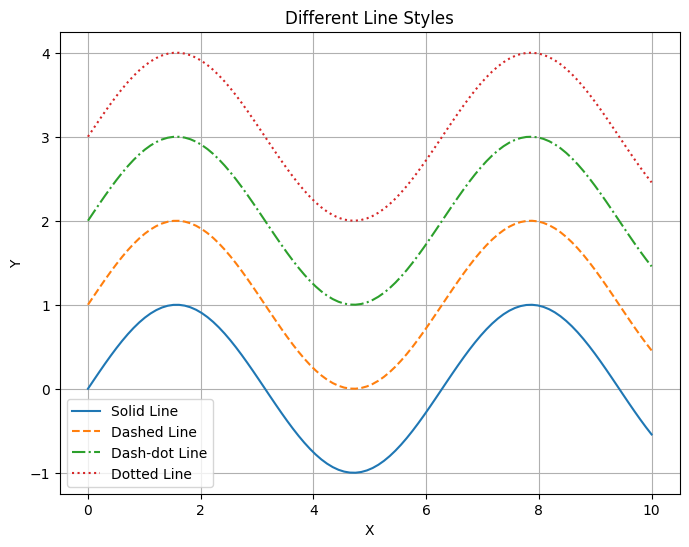

In [17]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.figure(figsize=(8, 6))

# Solid line
plt.plot(x, y, linestyle='-', label='Solid Line')

# Dashed line
plt.plot(x, y + 1, linestyle='--', label='Dashed Line')

# Dash-dot line
plt.plot(x, y + 2, linestyle='-.', label='Dash-dot Line')

# Dotted line
plt.plot(x, y + 3, linestyle=':', label='Dotted Line')

plt.legend()
plt.title('Different Line Styles')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()
